In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [492]:
#Exploratory Data Analysis
titanicdf = pd.read_csv("C:/Users/Admin/Titanic dataset/Titanic-dataset.csv")

In [494]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [496]:
print(titanicdf.shape)

(891, 12)


In [498]:
print(titanicdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


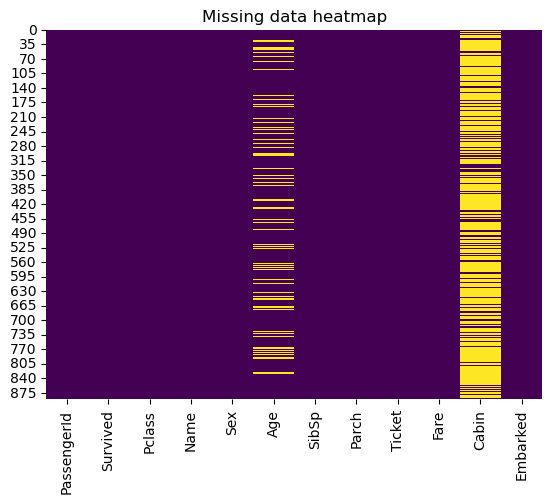

In [500]:
sns.heatmap(titanicdf.isnull(), cbar=False, cmap = 'viridis')
plt.title("Missing data heatmap")
plt.show()

In [502]:
print(titanicdf.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [620]:
print(titanicdf.describe())


       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.382907   
std     257.353842    0.486592    0.836071    0.477990   13.260272   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   27.000000   
75%     668.500000    1.000000    3.000000    1.000000   36.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch           Q           S  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594    0.086420    0.722783  
std      1.102743    0.806057    0.281141    0.447876  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    

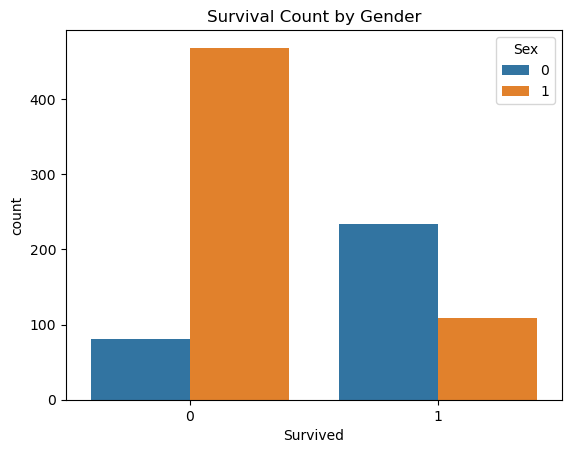

In [622]:
sns.countplot(x='Survived', hue='Sex', data=titanicdf)
plt.title("Survival Count by Gender")
plt.show()


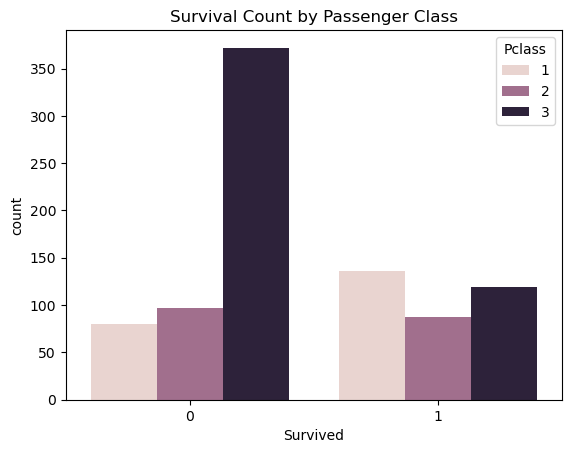

In [624]:
sns.countplot(x='Survived', hue='Pclass', data=titanicdf)
plt.title("Survival Count by Passenger Class")
plt.show()


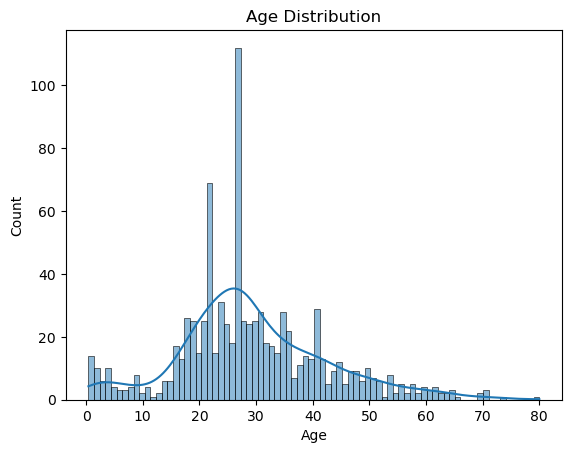

In [626]:
sns.histplot(titanicdf['Age'].dropna(), bins=80, kde=True)
plt.title("Age Distribution")
plt.show()


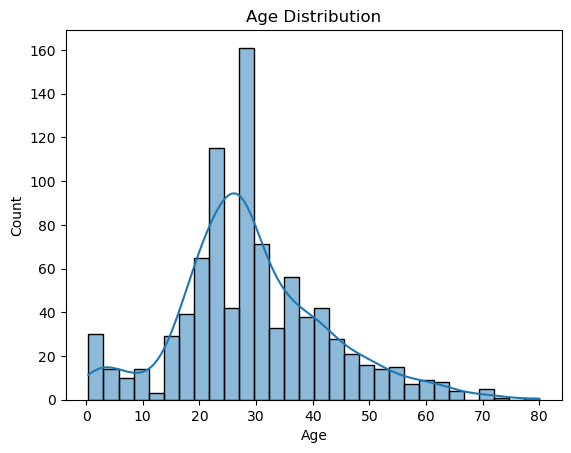

In [628]:
sns.histplot(titanicdf['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


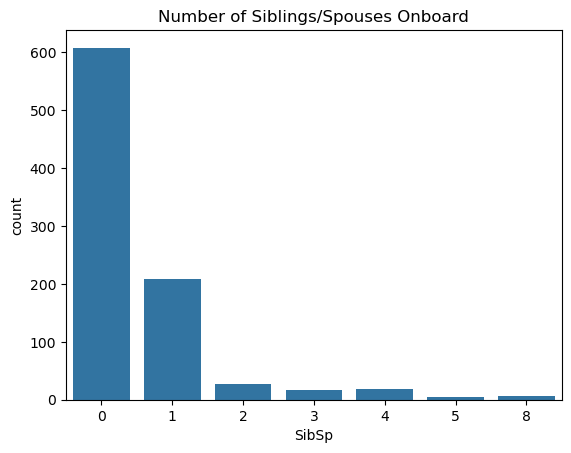

In [630]:
sns.countplot(x='SibSp', data=titanicdf)
plt.title("Number of Siblings/Spouses Onboard")
plt.show()


In [504]:
mean_age_by_class = titanicdf.groupby(['Pclass', 'Sex'])['Age'].mean()
print(mean_age_by_class)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


In [506]:
# Define a function to impute missing Age values based on Pclass means
def impute_age(row):
    Age = row['Age']
    Pclass = row['Pclass']
    Sex = row['Sex']
    if pd.isnull(Age):
        if Pclass == 1:
            if Sex == 'male':
                return 41  # Average age of males for class 1
            else:
                return 35
        elif Pclass == 2:
            if Sex == 'male':
                return 31 # Average age of males for class 2
            else:
                return 29
        else:
            if Sex == 'male':
                return 27  # Average age of males for class 3
            else:
                return 22
              
    else:
        return Age

# Apply the function to the Age column
titanicdf['Age'] = titanicdf.apply(impute_age, axis=1)


In [508]:
# Drop the 'Cabin' column as it has too many missing values to be useful Inplace=True means changes will modify in df
titanicdf.drop('Cabin', axis=1, inplace=True)


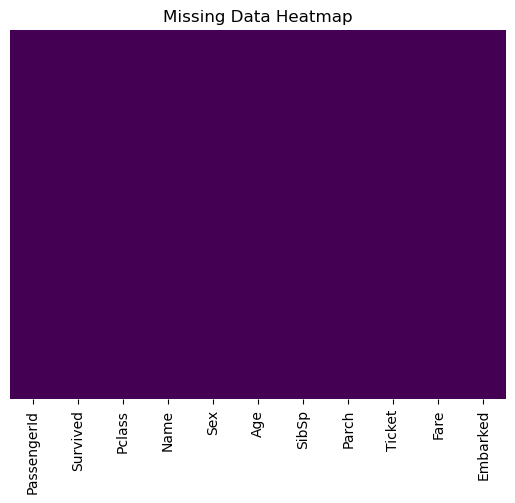

In [510]:
sns.heatmap(titanicdf.isnull(),  yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [566]:
# Convert 'Sex' categorical column to numeric: male=1, female=0
titanicdf['Sex'] = titanicdf['Sex'].map({'male': 1, 'female': 0})

In [568]:
#print("\tGender")
print(titanicdf["Sex"])


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [516]:
# Create dummy variables for 'Embarked' column
#embarked_dummies = pd.get_dummies(titanicdf['Embarked'], drop_first=True).astype(int)

In [548]:
# Concatenate dummy variables with original dataframe
titanicdf = pd.concat([titanicdf, embarked_dummies], axis=1)

# Drop original 'Embarked' column as it's now encoded
titanicdf.drop('Embarked', axis=1, inplace=True)

In [550]:
embarked_dummies

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [552]:
titanicdf

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Q,S
0,1,0,3,male,22.0,1,0,0,1
1,2,1,1,female,38.0,1,0,0,0
2,3,1,3,female,26.0,0,0,0,1
3,4,1,1,female,35.0,1,0,0,1
4,5,0,3,male,35.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,0,1
887,888,1,1,female,19.0,0,0,0,1
888,889,0,3,female,22.0,1,2,0,1
889,890,1,1,male,26.0,0,0,0,0


In [602]:
#ftitanic.drop(['Name','Ticket'], axis = 1, inplace = True)
new_df = titanicdf.drop(['Name','Ticket', 'Fare', 'PassengerId'], axis = 1, errors='ignore')

In [604]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Q,S
0,0,3,1,22.0,1,0,0,1
1,1,1,0,38.0,1,0,0,0
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0,1
887,1,1,0,19.0,0,0,0,1
888,0,3,0,22.0,1,2,0,1
889,1,1,1,26.0,0,0,0,0


In [1]:
# Import necessary libraries for machine learning and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


In [608]:
# Perform train-test split (70% train, 30% test)
# X df.drop Features (all columns except 'Survived')
# Y df Target variable (survival status)
X = new_df.drop('Survived', axis=1)
Y = new_df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=89)


In [638]:
# Initialize Logistic Regression model with max iterations set high
model = DecisionTreeClassifier(max_depth=8, random_state=42)
# Train the model on training data
model.fit(X_train, Y_train)

# Save the model for Streamlit
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as model.pkl")

Model saved as model.pkl


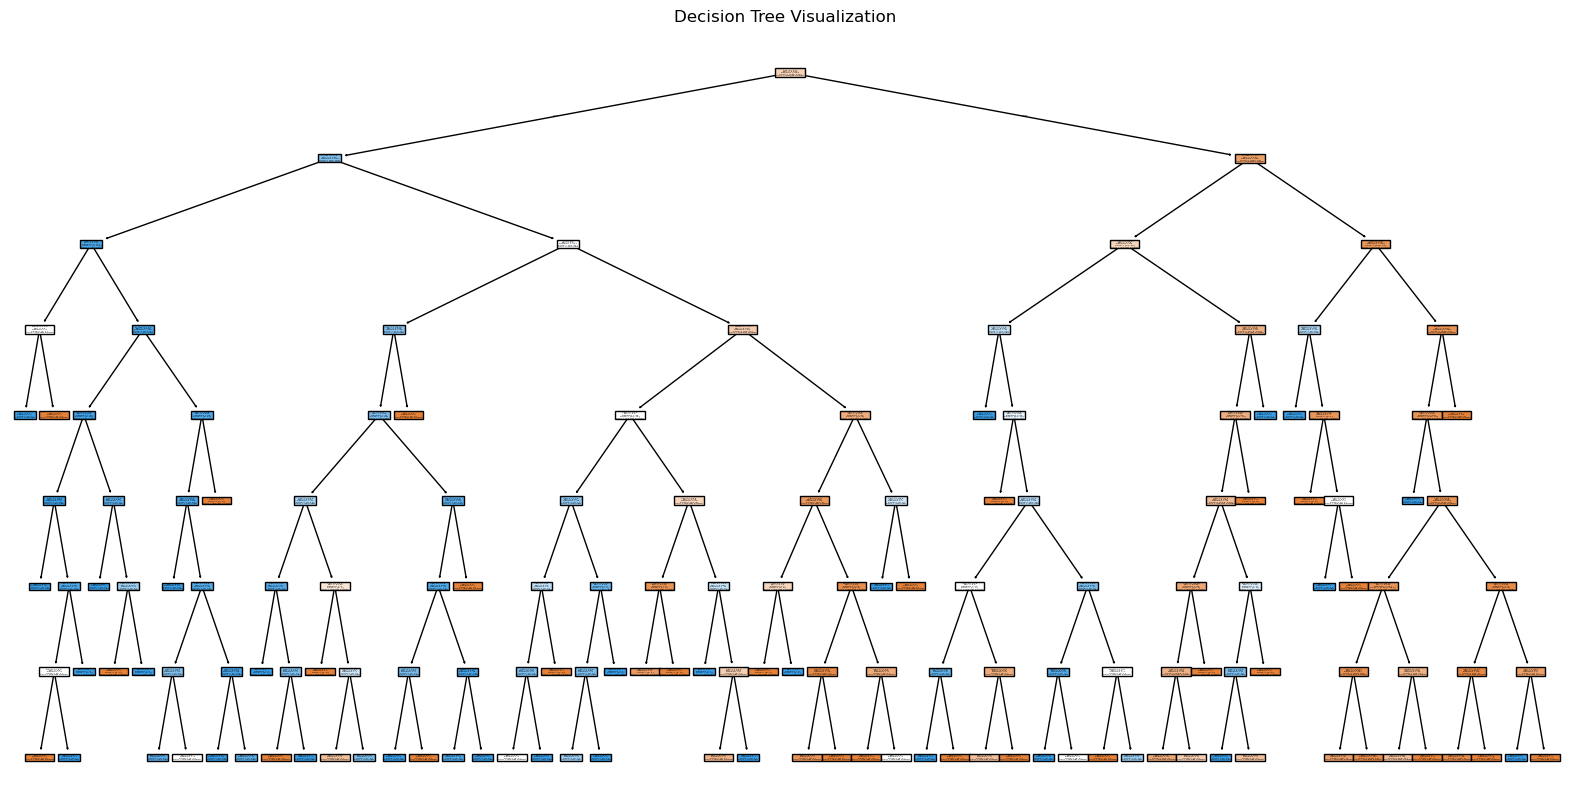

In [640]:
#Visualize Decision Tree
# ======================================
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Did Not Survive', 'Survived'])
plt.title('Decision Tree Visualization')
plt.show()


In [612]:
# Predict on test data
y_pred = model.predict(X_test)


In [614]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [616]:
# Calculate accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.83


Accuracy  : 0.83
Precision : 0.84
Recall    : 0.67
F1 Score  : 0.74

Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.83      0.92      0.87       169
       Survived       0.84      0.67      0.74        99

       accuracy                           0.83       268
      macro avg       0.83      0.79      0.81       268
   weighted avg       0.83      0.83      0.82       268



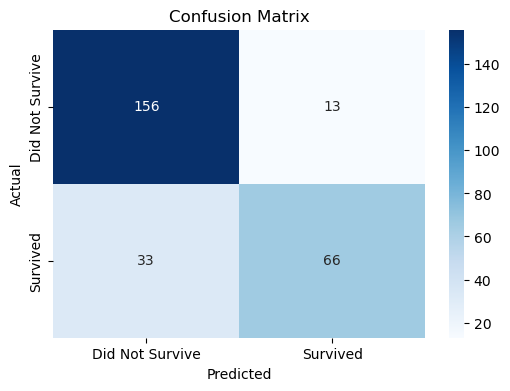

In [618]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
